# Hand Gesture Detection For Speech-Impaired Peoples 

## Libraries 

In [1]:
import tensorflow as tf
import keras 
import pandas as pd
import numpy as np
import os
import cv2
import random
import time 
import pyttsx3
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout , AvgPool2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



## --------------  Selection the Random Images From Each Class ----------------

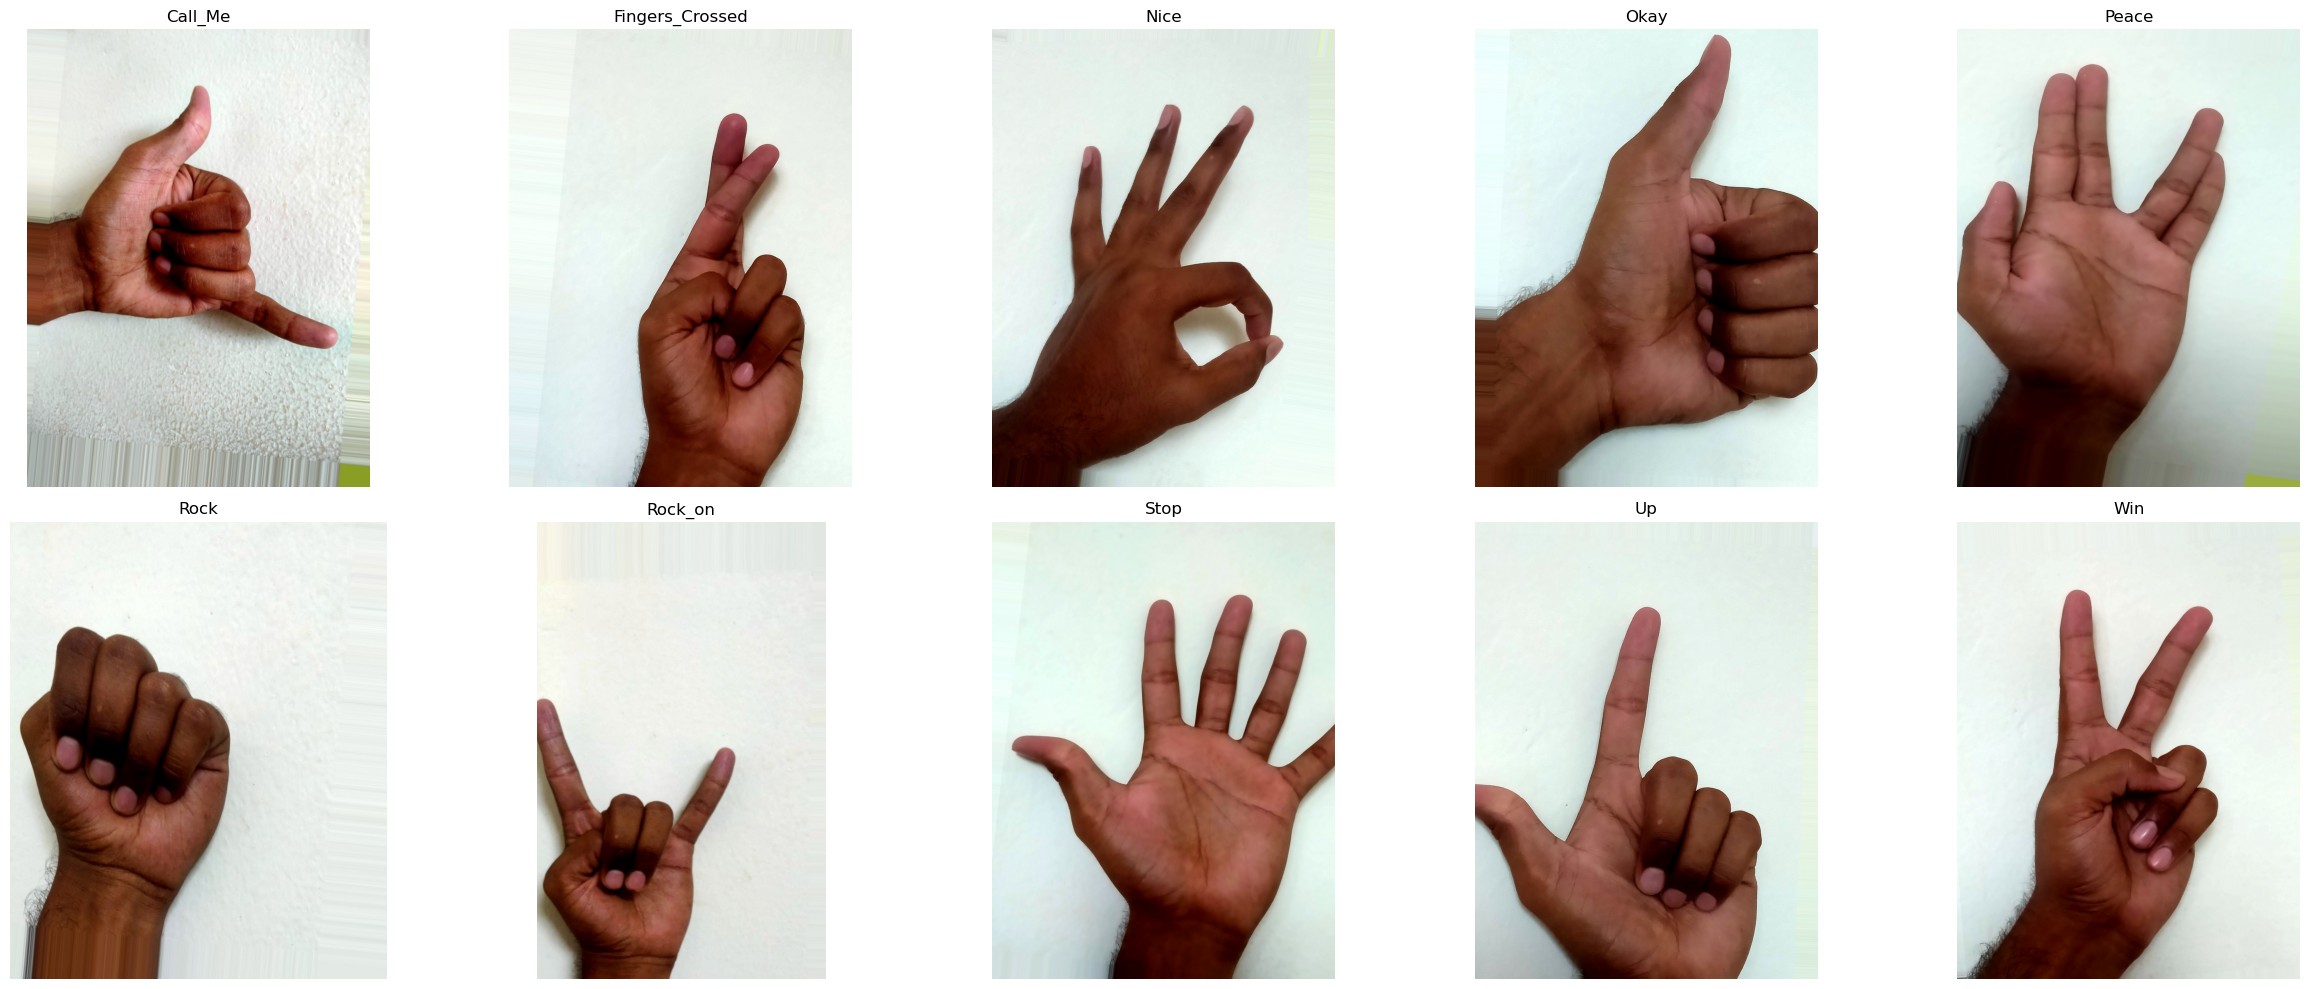

In [2]:
selected_images = []
directory = r"D:\Imarticus Learning\Neural_network\Project_hand_geture"

for class_name in os.listdir(directory):
    class_dir = os.path.join(directory, class_name) #Each Class name
    files = os.listdir(class_dir) # Select the all images in each Class
    if files:   
        selected_image = random.choice(files) # Select one random image
        selected_image_path = os.path.join(class_dir, selected_image)
        # Append the image path and class name to the list
        selected_images.append((selected_image_path, class_name))
        
# Plot the selected images
plt.figure(figsize=(25, 10))

for i, (image_path, class_name) in enumerate(selected_images):
    img = Image.open(image_path)  # Open the image
    plt.subplot(2, 5, i + 1)    # Add a subplot
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()  # Adjust layout and show the plot
plt.show()


## --------------------- Mapping Fuctionality To Model --------------------------

In [2]:
directory = r"D:\Imarticus Learning\Neural_network\Project_hand_geture"

In [3]:
File=[]
for file in os.listdir(directory): 
    File+=[file] 
print(File)    
print(len(File))

['Call_Me', 'Fingers_Crossed', 'Nice', 'Okay', 'Peace', 'Rock', 'Rock_on', 'Stop', 'Up', 'Win']
10


In [4]:
N=[]
for i in range(len(File)):
    N= N + [i]
reverse_mapping=dict(zip(N,File)) 

def mapper(value):
    return reverse_mapping[value]

reverse_mapping=dict(zip(N,File)) 
print(reverse_mapping)


{0: 'Call_Me', 1: 'Fingers_Crossed', 2: 'Nice', 3: 'Okay', 4: 'Peace', 5: 'Rock', 6: 'Rock_on', 7: 'Stop', 8: 'Up', 9: 'Win'}


## ----------------- Split The Images into the Train and Test ----------------------

In [5]:
Start_time = time.time()
trainset = []
testset = []
count=0
for file in File:
    path=os.path.join(directory,file) #Join the directory path and class
    t=0
    for im in os.listdir(path): 
        print(im ,t)      # Select the images from each class 
        image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(120,120))
        image=img_to_array(image)          # Convert the image into array
        image=image/255.0                  # Normalised the Array (X-Xmin / Xmax - Xmin)
        if t<1000:                        
            trainset.append([image,count]) # Dataset contain the image and its Output
        else:   
            testset.append([image,count])
        t+=1
    count=count+1
End_time = time.time()

A_Call_0_1045.JPG 0
A_Call_0_1089.JPG 1
A_Call_0_1117.JPG 2
A_Call_0_1231.JPG 3
A_Call_0_1254.JPG 4
A_Call_0_1268.JPG 5
A_Call_0_1417.JPG 6
A_Call_0_1464.JPG 7
A_Call_0_1485.JPG 8
A_Call_0_1669.JPG 9
A_Call_0_1717.JPG 10
A_Call_0_1753.JPG 11
A_Call_0_1764.JPG 12
A_Call_0_1802.JPG 13
A_Call_0_1836.JPG 14
A_Call_0_1858.JPG 15
A_Call_0_2103.JPG 16
A_Call_0_2241.JPG 17
A_Call_0_2379.JPG 18
A_Call_0_246.JPG 19
A_Call_0_2489.JPG 20
A_Call_0_2640.JPG 21
A_Call_0_2696.JPG 22
A_Call_0_270.JPG 23
A_Call_0_2700.JPG 24
A_Call_0_2971.JPG 25
A_Call_0_2988.JPG 26
A_Call_0_3017.JPG 27
A_Call_0_3066.JPG 28
A_Call_0_3084.JPG 29
A_Call_0_3101.JPG 30
A_Call_0_3115.JPG 31
A_Call_0_331.JPG 32
A_Call_0_3499.JPG 33
A_Call_0_3535.JPG 34
A_Call_0_3682.JPG 35
A_Call_0_3687.JPG 36
A_Call_0_3702.JPG 37
A_Call_0_3735.JPG 38
A_Call_0_380.JPG 39
A_Call_0_3929.JPG 40
A_Call_0_4095.JPG 41
A_Call_0_4178.JPG 42
A_Call_0_4186.JPG 43
A_Call_0_4581.JPG 44
A_Call_0_4582.JPG 45
A_Call_0_4694.JPG 46
A_Call_0_4709.JPG 47
A_Call

Call_me_0_2635.JPG 368
Call_me_0_2643.JPG 369
Call_me_0_2648.JPG 370
Call_me_0_2649.JPG 371
Call_me_0_2651.JPG 372
Call_me_0_2655.JPG 373
Call_me_0_2663.JPG 374
Call_me_0_2666.JPG 375
Call_me_0_2678.JPG 376
Call_me_0_2694.JPG 377
Call_me_0_2701.JPG 378
Call_me_0_2703.JPG 379
Call_me_0_273.JPG 380
Call_me_0_2732.JPG 381
Call_me_0_2739.JPG 382
Call_me_0_2744.JPG 383
Call_me_0_2747.JPG 384
Call_me_0_2760.JPG 385
Call_me_0_2764.JPG 386
Call_me_0_2765.JPG 387
Call_me_0_2777.JPG 388
Call_me_0_2802.JPG 389
Call_me_0_2815.JPG 390
Call_me_0_2822.JPG 391
Call_me_0_2824.JPG 392
Call_me_0_2827.JPG 393
Call_me_0_2831.JPG 394
Call_me_0_2832.JPG 395
Call_me_0_2839.JPG 396
Call_me_0_2843.JPG 397
Call_me_0_2877.JPG 398
Call_me_0_2886.JPG 399
Call_me_0_2896.JPG 400
Call_me_0_2905.JPG 401
Call_me_0_2910.JPG 402
Call_me_0_2914.JPG 403
Call_me_0_2940.JPG 404
Call_me_0_2956.JPG 405
Call_me_0_2959.JPG 406
Call_me_0_2979.JPG 407
Call_me_0_2992.JPG 408
Call_me_0_2996.JPG 409
Call_me_0_2997.JPG 410
Call_me_0_30

Call_me_0_5115.JPG 726
Call_me_0_512.JPG 727
Call_me_0_5123.JPG 728
Call_me_0_5144.JPG 729
Call_me_0_5148.JPG 730
Call_me_0_5151.JPG 731
Call_me_0_516.JPG 732
Call_me_0_5173.JPG 733
Call_me_0_5180.JPG 734
Call_me_0_5191.JPG 735
Call_me_0_5192.JPG 736
Call_me_0_5194.JPG 737
Call_me_0_5199.JPG 738
Call_me_0_5202.JPG 739
Call_me_0_5203.JPG 740
Call_me_0_5210.JPG 741
Call_me_0_5212.JPG 742
Call_me_0_5220.JPG 743
Call_me_0_5221.JPG 744
Call_me_0_5222.JPG 745
Call_me_0_5233.JPG 746
Call_me_0_5235.JPG 747
Call_me_0_5236.JPG 748
Call_me_0_5243.JPG 749
Call_me_0_5263.JPG 750
Call_me_0_5267.JPG 751
Call_me_0_5268.JPG 752
Call_me_0_5271.JPG 753
Call_me_0_5279.JPG 754
Call_me_0_5286.JPG 755
Call_me_0_5287.JPG 756
Call_me_0_5336.JPG 757
Call_me_0_5338.JPG 758
Call_me_0_5344.JPG 759
Call_me_0_5347.JPG 760
Call_me_0_5351.JPG 761
Call_me_0_537.JPG 762
Call_me_0_5385.JPG 763
Call_me_0_5398.JPG 764
Call_me_0_5402.JPG 765
Call_me_0_5405.JPG 766
Call_me_0_5406.JPG 767
Call_me_0_5407.JPG 768
Call_me_0_5415

Call_me_0_7462.JPG 1081
Call_me_0_7463.JPG 1082
Call_me_0_7465.JPG 1083
Call_me_0_7471.JPG 1084
Call_me_0_7482.JPG 1085
Call_me_0_7489.JPG 1086
Call_me_0_7497.JPG 1087
Call_me_0_7499.JPG 1088
Call_me_0_75.JPG 1089
Call_me_0_7503.JPG 1090
Call_me_0_7505.JPG 1091
Call_me_0_7507.JPG 1092
Call_me_0_7509.JPG 1093
Call_me_0_7515.JPG 1094
Call_me_0_7517.JPG 1095
Call_me_0_7518.JPG 1096
Call_me_0_753.JPG 1097
Call_me_0_7540.JPG 1098
Call_me_0_7563.JPG 1099
Call_me_0_7564.JPG 1100
Call_me_0_7565.JPG 1101
Call_me_0_7580.JPG 1102
Call_me_0_7597.JPG 1103
Call_me_0_7600.JPG 1104
Call_me_0_7603.JPG 1105
Call_me_0_7613.JPG 1106
Call_me_0_7623.JPG 1107
Call_me_0_7629.JPG 1108
Call_me_0_7630.JPG 1109
Call_me_0_7645.JPG 1110
Call_me_0_7659.JPG 1111
Call_me_0_766.JPG 1112
Call_me_0_7665.JPG 1113
Call_me_0_7676.JPG 1114
Call_me_0_7680.JPG 1115
Call_me_0_7681.JPG 1116
Call_me_0_7691.JPG 1117
Call_me_0_7700.JPG 1118
Call_me_0_7704.JPG 1119
Call_me_0_7708.JPG 1120
Call_me_0_7723.JPG 1121
Call_me_0_7729.JPG 1

Call_me_0_9521.JPG 1425
Call_me_0_9536.JPG 1426
Call_me_0_9541.JPG 1427
Call_me_0_955.JPG 1428
Call_me_0_9552.JPG 1429
Call_me_0_9560.JPG 1430
Call_me_0_9569.JPG 1431
Call_me_0_9575.JPG 1432
Call_me_0_9577.JPG 1433
Call_me_0_9579.JPG 1434
Call_me_0_9581.JPG 1435
Call_me_0_9586.JPG 1436
Call_me_0_9593.JPG 1437
Call_me_0_9602.JPG 1438
Call_me_0_9605.JPG 1439
Call_me_0_9606.JPG 1440
Call_me_0_9614.JPG 1441
Call_me_0_9620.JPG 1442
Call_me_0_9623.JPG 1443
Call_me_0_9632.JPG 1444
Call_me_0_9633.JPG 1445
Call_me_0_9664.JPG 1446
Call_me_0_9667.JPG 1447
Call_me_0_9673.JPG 1448
Call_me_0_9678.JPG 1449
Call_me_0_968.JPG 1450
Call_me_0_9688.JPG 1451
Call_me_0_9694.JPG 1452
Call_me_0_9709.JPG 1453
Call_me_0_971.JPG 1454
Call_me_0_9712.JPG 1455
Call_me_0_9716.JPG 1456
Call_me_0_9719.JPG 1457
Call_me_0_9721.JPG 1458
Call_me_0_9732.JPG 1459
Call_me_0_9735.JPG 1460
Call_me_0_9740.JPG 1461
Call_me_0_9742.JPG 1462
Call_me_0_9743.JPG 1463
Call_me_0_9749.JPG 1464
Call_me_0_9759.JPG 1465
Call_me_0_9776.JPG 

Finger_Cross_0_249.JPG 234
Finger_Cross_0_2495.JPG 235
Finger_Cross_0_2508.JPG 236
Finger_Cross_0_2512.JPG 237
Finger_Cross_0_2514.JPG 238
Finger_Cross_0_2520.JPG 239
Finger_Cross_0_2528.JPG 240
Finger_Cross_0_2530.JPG 241
Finger_Cross_0_2532.JPG 242
Finger_Cross_0_2535.JPG 243
Finger_Cross_0_2542.JPG 244
Finger_Cross_0_2545.JPG 245
Finger_Cross_0_2555.JPG 246
Finger_Cross_0_2557.JPG 247
Finger_Cross_0_2558.JPG 248
Finger_Cross_0_2569.JPG 249
Finger_Cross_0_2578.JPG 250
Finger_Cross_0_2584.JPG 251
Finger_Cross_0_2594.JPG 252
Finger_Cross_0_2604.JPG 253
Finger_Cross_0_2606.JPG 254
Finger_Cross_0_2611.JPG 255
Finger_Cross_0_2612.JPG 256
Finger_Cross_0_2617.JPG 257
Finger_Cross_0_2618.JPG 258
Finger_Cross_0_2627.JPG 259
Finger_Cross_0_2629.JPG 260
Finger_Cross_0_2647.JPG 261
Finger_Cross_0_2648.JPG 262
Finger_Cross_0_265.JPG 263
Finger_Cross_0_2653.JPG 264
Finger_Cross_0_2657.JPG 265
Finger_Cross_0_2660.JPG 266
Finger_Cross_0_2662.JPG 267
Finger_Cross_0_2663.JPG 268
Finger_Cross_0_2667.JP

Finger_Cross_0_4295.JPG 528
Finger_Cross_0_4296.JPG 529
Finger_Cross_0_4305.JPG 530
Finger_Cross_0_4318.JPG 531
Finger_Cross_0_433.JPG 532
Finger_Cross_0_4350.JPG 533
Finger_Cross_0_4351.JPG 534
Finger_Cross_0_4357.JPG 535
Finger_Cross_0_436.JPG 536
Finger_Cross_0_4363.JPG 537
Finger_Cross_0_4367.JPG 538
Finger_Cross_0_4390.JPG 539
Finger_Cross_0_4394.JPG 540
Finger_Cross_0_4395.JPG 541
Finger_Cross_0_4406.JPG 542
Finger_Cross_0_4422.JPG 543
Finger_Cross_0_4427.JPG 544
Finger_Cross_0_4430.JPG 545
Finger_Cross_0_4435.JPG 546
Finger_Cross_0_445.JPG 547
Finger_Cross_0_4451.JPG 548
Finger_Cross_0_4458.JPG 549
Finger_Cross_0_4461.JPG 550
Finger_Cross_0_4463.JPG 551
Finger_Cross_0_4466.JPG 552
Finger_Cross_0_4476.JPG 553
Finger_Cross_0_4478.JPG 554
Finger_Cross_0_448.JPG 555
Finger_Cross_0_4481.JPG 556
Finger_Cross_0_4488.JPG 557
Finger_Cross_0_449.JPG 558
Finger_Cross_0_4490.JPG 559
Finger_Cross_0_4493.JPG 560
Finger_Cross_0_4496.JPG 561
Finger_Cross_0_4499.JPG 562
Finger_Cross_0_4515.JPG 5

Finger_Cross_0_6255.JPG 822
Finger_Cross_0_6256.JPG 823
Finger_Cross_0_6260.JPG 824
Finger_Cross_0_6263.JPG 825
Finger_Cross_0_6273.JPG 826
Finger_Cross_0_629.JPG 827
Finger_Cross_0_6296.JPG 828
Finger_Cross_0_630.JPG 829
Finger_Cross_0_6313.JPG 830
Finger_Cross_0_6340.JPG 831
Finger_Cross_0_6342.JPG 832
Finger_Cross_0_6343.JPG 833
Finger_Cross_0_6350.JPG 834
Finger_Cross_0_6355.JPG 835
Finger_Cross_0_6366.JPG 836
Finger_Cross_0_6373.JPG 837
Finger_Cross_0_6388.JPG 838
Finger_Cross_0_6392.JPG 839
Finger_Cross_0_640.JPG 840
Finger_Cross_0_6405.JPG 841
Finger_Cross_0_641.JPG 842
Finger_Cross_0_6426.JPG 843
Finger_Cross_0_6441.JPG 844
Finger_Cross_0_6465.JPG 845
Finger_Cross_0_6473.JPG 846
Finger_Cross_0_6480.JPG 847
Finger_Cross_0_6482.JPG 848
Finger_Cross_0_6493.JPG 849
Finger_Cross_0_6495.JPG 850
Finger_Cross_0_6505.JPG 851
Finger_Cross_0_6511.JPG 852
Finger_Cross_0_6514.JPG 853
Finger_Cross_0_6525.JPG 854
Finger_Cross_0_6529.JPG 855
Finger_Cross_0_6532.JPG 856
Finger_Cross_0_6533.JPG 

Finger_Cross_0_813.JPG 1112
Finger_Cross_0_8133.JPG 1113
Finger_Cross_0_8149.JPG 1114
Finger_Cross_0_8150.JPG 1115
Finger_Cross_0_8152.JPG 1116
Finger_Cross_0_8168.JPG 1117
Finger_Cross_0_8180.JPG 1118
Finger_Cross_0_8188.JPG 1119
Finger_Cross_0_819.JPG 1120
Finger_Cross_0_8198.JPG 1121
Finger_Cross_0_8201.JPG 1122
Finger_Cross_0_8214.JPG 1123
Finger_Cross_0_8227.JPG 1124
Finger_Cross_0_8229.JPG 1125
Finger_Cross_0_823.JPG 1126
Finger_Cross_0_8235.JPG 1127
Finger_Cross_0_8237.JPG 1128
Finger_Cross_0_8243.JPG 1129
Finger_Cross_0_8244.JPG 1130
Finger_Cross_0_8245.JPG 1131
Finger_Cross_0_8262.JPG 1132
Finger_Cross_0_8265.JPG 1133
Finger_Cross_0_8274.JPG 1134
Finger_Cross_0_8276.JPG 1135
Finger_Cross_0_8289.JPG 1136
Finger_Cross_0_8294.JPG 1137
Finger_Cross_0_8299.JPG 1138
Finger_Cross_0_8310.JPG 1139
Finger_Cross_0_8332.JPG 1140
Finger_Cross_0_8339.JPG 1141
Finger_Cross_0_8344.JPG 1142
Finger_Cross_0_8348.JPG 1143
Finger_Cross_0_835.JPG 1144
Finger_Cross_0_8364.JPG 1145
Finger_Cross_0_836

Fin_cro_0_1496.JPG 1397
Fin_cro_0_1519.JPG 1398
Fin_cro_0_1543.JPG 1399
Fin_cro_0_1589.JPG 1400
Fin_cro_0_1677.JPG 1401
Fin_cro_0_1705.JPG 1402
Fin_cro_0_1882.JPG 1403
Fin_cro_0_206.JPG 1404
Fin_cro_0_2062.JPG 1405
Fin_cro_0_2097.JPG 1406
Fin_cro_0_2108.JPG 1407
Fin_cro_0_2123.JPG 1408
Fin_cro_0_2219.JPG 1409
Fin_cro_0_2381.JPG 1410
Fin_cro_0_241.JPG 1411
Fin_cro_0_2504.JPG 1412
Fin_cro_0_2544.JPG 1413
Fin_cro_0_2556.JPG 1414
Fin_cro_0_2595.JPG 1415
Fin_cro_0_2748.JPG 1416
Fin_cro_0_2772.JPG 1417
Fin_cro_0_2827.JPG 1418
Fin_cro_0_2839.JPG 1419
Fin_cro_0_2948.JPG 1420
Fin_cro_0_3009.JPG 1421
Fin_cro_0_3063.JPG 1422
Fin_cro_0_3074.JPG 1423
Fin_cro_0_3113.JPG 1424
Fin_cro_0_3156.JPG 1425
Fin_cro_0_330.JPG 1426
Fin_cro_0_3449.JPG 1427
Fin_cro_0_3459.JPG 1428
Fin_cro_0_3499.JPG 1429
Fin_cro_0_3535.JPG 1430
Fin_cro_0_3619.JPG 1431
Fin_cro_0_3636.JPG 1432
Fin_cro_0_3809.JPG 1433
Fin_cro_0_3814.JPG 1434
Fin_cro_0_4054.JPG 1435
Fin_cro_0_4128.JPG 1436
Fin_cro_0_4173.JPG 1437
Fin_cro_0_4194.JPG 

Nice_0_2842.JPG 294
Nice_0_2856.JPG 295
Nice_0_286.JPG 296
Nice_0_2864.JPG 297
Nice_0_2884.JPG 298
Nice_0_289.JPG 299
Nice_0_2905.JPG 300
Nice_0_2908.JPG 301
Nice_0_2922.JPG 302
Nice_0_2926.JPG 303
Nice_0_2929.JPG 304
Nice_0_2933.JPG 305
Nice_0_2939.JPG 306
Nice_0_2940.JPG 307
Nice_0_2943.JPG 308
Nice_0_2947.JPG 309
Nice_0_2950.JPG 310
Nice_0_2965.JPG 311
Nice_0_2972.JPG 312
Nice_0_2980.JPG 313
Nice_0_2982.JPG 314
Nice_0_2983.JPG 315
Nice_0_2990.JPG 316
Nice_0_30.JPG 317
Nice_0_3003.JPG 318
Nice_0_3009.JPG 319
Nice_0_3012.JPG 320
Nice_0_3016.JPG 321
Nice_0_3019.JPG 322
Nice_0_302.JPG 323
Nice_0_3026.JPG 324
Nice_0_3029.JPG 325
Nice_0_3030.JPG 326
Nice_0_3040.JPG 327
Nice_0_3043.JPG 328
Nice_0_3046.JPG 329
Nice_0_3050.JPG 330
Nice_0_3056.JPG 331
Nice_0_3067.JPG 332
Nice_0_3073.JPG 333
Nice_0_3075.JPG 334
Nice_0_3078.JPG 335
Nice_0_308.JPG 336
Nice_0_3085.JPG 337
Nice_0_309.JPG 338
Nice_0_3095.JPG 339
Nice_0_3109.JPG 340
Nice_0_3112.JPG 341
Nice_0_312.JPG 342
Nice_0_3125.JPG 343
Nice_0_3

Nice_0_5381.JPG 706
Nice_0_5394.JPG 707
Nice_0_5399.JPG 708
Nice_0_5403.JPG 709
Nice_0_5406.JPG 710
Nice_0_5411.JPG 711
Nice_0_5412.JPG 712
Nice_0_5417.JPG 713
Nice_0_5420.JPG 714
Nice_0_5426.JPG 715
Nice_0_5431.JPG 716
Nice_0_5436.JPG 717
Nice_0_544.JPG 718
Nice_0_5443.JPG 719
Nice_0_5453.JPG 720
Nice_0_5456.JPG 721
Nice_0_5457.JPG 722
Nice_0_547.JPG 723
Nice_0_5470.JPG 724
Nice_0_5471.JPG 725
Nice_0_5472.JPG 726
Nice_0_5475.JPG 727
Nice_0_5492.JPG 728
Nice_0_5493.JPG 729
Nice_0_5501.JPG 730
Nice_0_5511.JPG 731
Nice_0_5514.JPG 732
Nice_0_5516.JPG 733
Nice_0_5517.JPG 734
Nice_0_5521.JPG 735
Nice_0_553.JPG 736
Nice_0_5532.JPG 737
Nice_0_5536.JPG 738
Nice_0_5543.JPG 739
Nice_0_5549.JPG 740
Nice_0_5550.JPG 741
Nice_0_5564.JPG 742
Nice_0_557.JPG 743
Nice_0_5572.JPG 744
Nice_0_5576.JPG 745
Nice_0_5578.JPG 746
Nice_0_5579.JPG 747
Nice_0_5580.JPG 748
Nice_0_5581.JPG 749
Nice_0_559.JPG 750
Nice_0_5601.JPG 751
Nice_0_5603.JPG 752
Nice_0_5606.JPG 753
Nice_0_5609.JPG 754
Nice_0_5618.JPG 755
Nice_

Nice_0_775.JPG 1112
Nice_0_7758.JPG 1113
Nice_0_776.JPG 1114
Nice_0_7766.JPG 1115
Nice_0_7768.JPG 1116
Nice_0_777.JPG 1117
Nice_0_7771.JPG 1118
Nice_0_7773.JPG 1119
Nice_0_7777.JPG 1120
Nice_0_7785.JPG 1121
Nice_0_7815.JPG 1122
Nice_0_7816.JPG 1123
Nice_0_7821.JPG 1124
Nice_0_7830.JPG 1125
Nice_0_7835.JPG 1126
Nice_0_7836.JPG 1127
Nice_0_7838.JPG 1128
Nice_0_7845.JPG 1129
Nice_0_7856.JPG 1130
Nice_0_7865.JPG 1131
Nice_0_7872.JPG 1132
Nice_0_7877.JPG 1133
Nice_0_7878.JPG 1134
Nice_0_788.JPG 1135
Nice_0_7881.JPG 1136
Nice_0_7882.JPG 1137
Nice_0_7886.JPG 1138
Nice_0_7893.JPG 1139
Nice_0_79.JPG 1140
Nice_0_7907.JPG 1141
Nice_0_791.JPG 1142
Nice_0_7911.JPG 1143
Nice_0_7912.JPG 1144
Nice_0_7919.JPG 1145
Nice_0_7922.JPG 1146
Nice_0_7924.JPG 1147
Nice_0_7926.JPG 1148
Nice_0_7935.JPG 1149
Nice_0_796.JPG 1150
Nice_0_7966.JPG 1151
Nice_0_797.JPG 1152
Nice_0_7972.JPG 1153
Nice_0_7973.JPG 1154
Nice_0_7974.JPG 1155
Nice_0_7975.JPG 1156
Nice_0_7982.JPG 1157
Nice_0_7983.JPG 1158
Nice_0_7989.JPG 1159
N

Nice_0_1035.JPG 5
Nice_0_1040.JPG 6
Nice_0_1060.JPG 7
Nice_0_1070.JPG 8
Nice_0_1082.JPG 9
Nice_0_1084.JPG 10
Nice_0_1086.JPG 11
Nice_0_1096.JPG 12
Nice_0_1103.JPG 13
Nice_0_1105.JPG 14
Nice_0_1107.JPG 15
Nice_0_1108.JPG 16
Nice_0_1130.JPG 17
Nice_0_1142.JPG 18
Nice_0_1143.JPG 19
Nice_0_1159.JPG 20
Nice_0_1161.JPG 21
Nice_0_1173.JPG 22
Nice_0_1188.JPG 23
Nice_0_1221.JPG 24
Nice_0_1227.JPG 25
Nice_0_1234.JPG 26
Nice_0_1237.JPG 27
Nice_0_1251.JPG 28
Nice_0_1252.JPG 29
Nice_0_1256.JPG 30
Nice_0_1258.JPG 31
Nice_0_1259.JPG 32
Nice_0_1261.JPG 33
Nice_0_1262.JPG 34
Nice_0_1263.JPG 35
Nice_0_1267.JPG 36
Nice_0_1281.JPG 37
Nice_0_1285.JPG 38
Nice_0_1295.JPG 39
Nice_0_1296.JPG 40
Nice_0_1299.JPG 41
Nice_0_1305.JPG 42
Nice_0_1307.JPG 43
Nice_0_1335.JPG 44
Nice_0_1339.JPG 45
Nice_0_1343.JPG 46
Nice_0_1346.JPG 47
Nice_0_1348.JPG 48
Nice_0_1351.JPG 49
Nice_0_1354.JPG 50
Nice_0_1362.JPG 51
Nice_0_1384.JPG 52
Nice_0_1389.JPG 53
Nice_0_1393.JPG 54
Nice_0_1406.JPG 55
Nice_0_1410.JPG 56
Nice_0_1417.JPG 5

Nice_0_3806.JPG 421
Nice_0_3813.JPG 422
Nice_0_3818.JPG 423
Nice_0_3820.JPG 424
Nice_0_3822.JPG 425
Nice_0_3829.JPG 426
Nice_0_3834.JPG 427
Nice_0_3844.JPG 428
Nice_0_3860.JPG 429
Nice_0_3870.JPG 430
Nice_0_3888.JPG 431
Nice_0_3902.JPG 432
Nice_0_3910.JPG 433
Nice_0_3931.JPG 434
Nice_0_3932.JPG 435
Nice_0_3939.JPG 436
Nice_0_3942.JPG 437
Nice_0_3949.JPG 438
Nice_0_3952.JPG 439
Nice_0_3953.JPG 440
Nice_0_3968.JPG 441
Nice_0_3978.JPG 442
Nice_0_3981.JPG 443
Nice_0_3990.JPG 444
Nice_0_3997.JPG 445
Nice_0_4004.JPG 446
Nice_0_4012.JPG 447
Nice_0_4014.JPG 448
Nice_0_4016.JPG 449
Nice_0_4020.JPG 450
Nice_0_4029.JPG 451
Nice_0_4037.JPG 452
Nice_0_4039.JPG 453
Nice_0_4044.JPG 454
Nice_0_4051.JPG 455
Nice_0_4057.JPG 456
Nice_0_4062.JPG 457
Nice_0_4070.JPG 458
Nice_0_4072.JPG 459
Nice_0_4080.JPG 460
Nice_0_4083.JPG 461
Nice_0_4084.JPG 462
Nice_0_4092.JPG 463
Nice_0_4097.JPG 464
Nice_0_4098.JPG 465
Nice_0_4101.JPG 466
Nice_0_4117.JPG 467
Nice_0_4127.JPG 468
Nice_0_4130.JPG 469
Nice_0_4149.JPG 470


Nice_0_6534.JPG 833
Nice_0_6544.JPG 834
Nice_0_6550.JPG 835
Nice_0_6557.JPG 836
Nice_0_6559.JPG 837
Nice_0_6568.JPG 838
Nice_0_6576.JPG 839
Nice_0_6579.JPG 840
Nice_0_6582.JPG 841
Nice_0_6584.JPG 842
Nice_0_6586.JPG 843
Nice_0_6594.JPG 844
Nice_0_6595.JPG 845
Nice_0_6603.JPG 846
Nice_0_6606.JPG 847
Nice_0_6610.JPG 848
Nice_0_6615.JPG 849
Nice_0_6629.JPG 850
Nice_0_6635.JPG 851
Nice_0_6646.JPG 852
Nice_0_6648.JPG 853
Nice_0_6649.JPG 854
Nice_0_667.JPG 855
Nice_0_6671.JPG 856
Nice_0_6672.JPG 857
Nice_0_6673.JPG 858
Nice_0_6674.JPG 859
Nice_0_6675.JPG 860
Nice_0_670.JPG 861
Nice_0_6723.JPG 862
Nice_0_673.JPG 863
Nice_0_6732.JPG 864
Nice_0_6735.JPG 865
Nice_0_6737.JPG 866
Nice_0_674.JPG 867
Nice_0_6742.JPG 868
Nice_0_6744.JPG 869
Nice_0_6745.JPG 870
Nice_0_6747.JPG 871
Nice_0_6748.JPG 872
Nice_0_675.JPG 873
Nice_0_6758.JPG 874
Nice_0_676.JPG 875
Nice_0_6760.JPG 876
Nice_0_6765.JPG 877
Nice_0_6771.JPG 878
Nice_0_6773.JPG 879
Nice_0_6776.JPG 880
Nice_0_6797.JPG 881
Nice_0_681.JPG 882
Nice_0_

Nice_0_9127.JPG 1233
Nice_0_9146.JPG 1234
Nice_0_9156.JPG 1235
Nice_0_9177.JPG 1236
Nice_0_9179.JPG 1237
Nice_0_9184.JPG 1238
Nice_0_9186.JPG 1239
Nice_0_9201.JPG 1240
Nice_0_9203.JPG 1241
Nice_0_9205.JPG 1242
Nice_0_9209.JPG 1243
Nice_0_921.JPG 1244
Nice_0_9214.JPG 1245
Nice_0_9215.JPG 1246
Nice_0_9235.JPG 1247
Nice_0_9247.JPG 1248
Nice_0_9248.JPG 1249
Nice_0_9253.JPG 1250
Nice_0_9262.JPG 1251
Nice_0_9266.JPG 1252
Nice_0_9273.JPG 1253
Nice_0_9280.JPG 1254
Nice_0_9302.JPG 1255
Nice_0_9305.JPG 1256
Nice_0_9323.JPG 1257
Nice_0_9325.JPG 1258
Nice_0_9327.JPG 1259
Nice_0_9333.JPG 1260
Nice_0_9339.JPG 1261
Nice_0_9358.JPG 1262
Nice_0_9373.JPG 1263
Nice_0_9393.JPG 1264
Nice_0_9398.JPG 1265
Nice_0_940.JPG 1266
Nice_0_9400.JPG 1267
Nice_0_9406.JPG 1268
Nice_0_9415.JPG 1269
Nice_0_9417.JPG 1270
Nice_0_9422.JPG 1271
Nice_0_9437.JPG 1272
Nice_0_9443.JPG 1273
Nice_0_9445.JPG 1274
Nice_0_9447.JPG 1275
Nice_0_9456.JPG 1276
Nice_0_9466.JPG 1277
Nice_0_9471.JPG 1278
Nice_0_9472.JPG 1279
Nice_0_9475.JPG

Peace_0_1793.JPG 131
Peace_0_1807.JPG 132
Peace_0_1808.JPG 133
Peace_0_1814.JPG 134
Peace_0_1830.JPG 135
Peace_0_1835.JPG 136
Peace_0_1842.JPG 137
Peace_0_1843.JPG 138
Peace_0_1844.JPG 139
Peace_0_1849.JPG 140
Peace_0_1850.JPG 141
Peace_0_1851.JPG 142
Peace_0_1863.JPG 143
Peace_0_1869.JPG 144
Peace_0_1873.JPG 145
Peace_0_1880.JPG 146
Peace_0_1883.JPG 147
Peace_0_1888.JPG 148
Peace_0_1891.JPG 149
Peace_0_1892.JPG 150
Peace_0_1901.JPG 151
Peace_0_1914.JPG 152
Peace_0_1916.JPG 153
Peace_0_1922.JPG 154
Peace_0_1929.JPG 155
Peace_0_1931.JPG 156
Peace_0_1932.JPG 157
Peace_0_1939.JPG 158
Peace_0_1947.JPG 159
Peace_0_1956.JPG 160
Peace_0_1970.JPG 161
Peace_0_1975.JPG 162
Peace_0_1976.JPG 163
Peace_0_1977.JPG 164
Peace_0_1987.JPG 165
Peace_0_1988.JPG 166
Peace_0_2001.JPG 167
Peace_0_2003.JPG 168
Peace_0_2010.JPG 169
Peace_0_2015.JPG 170
Peace_0_2018.JPG 171
Peace_0_2035.JPG 172
Peace_0_204.JPG 173
Peace_0_2052.JPG 174
Peace_0_2063.JPG 175
Peace_0_2065.JPG 176
Peace_0_207.JPG 177
Peace_0_2076.JP

Peace_0_4194.JPG 523
Peace_0_4195.JPG 524
Peace_0_420.JPG 525
Peace_0_4200.JPG 526
Peace_0_4208.JPG 527
Peace_0_421.JPG 528
Peace_0_4213.JPG 529
Peace_0_4214.JPG 530
Peace_0_4220.JPG 531
Peace_0_4235.JPG 532
Peace_0_4236.JPG 533
Peace_0_426.JPG 534
Peace_0_4265.JPG 535
Peace_0_428.JPG 536
Peace_0_4292.JPG 537
Peace_0_4295.JPG 538
Peace_0_4296.JPG 539
Peace_0_430.JPG 540
Peace_0_4302.JPG 541
Peace_0_431.JPG 542
Peace_0_4317.JPG 543
Peace_0_4318.JPG 544
Peace_0_4335.JPG 545
Peace_0_4342.JPG 546
Peace_0_4345.JPG 547
Peace_0_4351.JPG 548
Peace_0_4358.JPG 549
Peace_0_4362.JPG 550
Peace_0_4363.JPG 551
Peace_0_4364.JPG 552
Peace_0_4375.JPG 553
Peace_0_4376.JPG 554
Peace_0_438.JPG 555
Peace_0_4385.JPG 556
Peace_0_4420.JPG 557
Peace_0_4422.JPG 558
Peace_0_4439.JPG 559
Peace_0_4440.JPG 560
Peace_0_4447.JPG 561
Peace_0_4450.JPG 562
Peace_0_4453.JPG 563
Peace_0_4454.JPG 564
Peace_0_4464.JPG 565
Peace_0_4468.JPG 566
Peace_0_447.JPG 567
Peace_0_4470.JPG 568
Peace_0_4471.JPG 569
Peace_0_4475.JPG 570


Peace_0_6517.JPG 916
Peace_0_6529.JPG 917
Peace_0_6537.JPG 918
Peace_0_6539.JPG 919
Peace_0_654.JPG 920
Peace_0_6540.JPG 921
Peace_0_6541.JPG 922
Peace_0_6550.JPG 923
Peace_0_6561.JPG 924
Peace_0_6563.JPG 925
Peace_0_6564.JPG 926
Peace_0_6581.JPG 927
Peace_0_6583.JPG 928
Peace_0_6594.JPG 929
Peace_0_66.JPG 930
Peace_0_660.JPG 931
Peace_0_6600.JPG 932
Peace_0_6601.JPG 933
Peace_0_6606.JPG 934
Peace_0_6611.JPG 935
Peace_0_6615.JPG 936
Peace_0_6618.JPG 937
Peace_0_662.JPG 938
Peace_0_6626.JPG 939
Peace_0_6631.JPG 940
Peace_0_6636.JPG 941
Peace_0_6650.JPG 942
Peace_0_6659.JPG 943
Peace_0_6668.JPG 944
Peace_0_6669.JPG 945
Peace_0_6678.JPG 946
Peace_0_6681.JPG 947
Peace_0_6683.JPG 948
Peace_0_6696.JPG 949
Peace_0_6703.JPG 950
Peace_0_6704.JPG 951
Peace_0_6707.JPG 952
Peace_0_6719.JPG 953
Peace_0_6722.JPG 954
Peace_0_6723.JPG 955
Peace_0_6725.JPG 956
Peace_0_6728.JPG 957
Peace_0_6729.JPG 958
Peace_0_6730.JPG 959
Peace_0_6759.JPG 960
Peace_0_6760.JPG 961
Peace_0_6761.JPG 962
Peace_0_6776.JPG 9

Peace_0_8692.JPG 1295
Peace_0_8708.JPG 1296
Peace_0_8717.JPG 1297
Peace_0_8730.JPG 1298
Peace_0_8731.JPG 1299
Peace_0_8738.JPG 1300
Peace_0_8741.JPG 1301
Peace_0_8749.JPG 1302
Peace_0_8756.JPG 1303
Peace_0_8760.JPG 1304
Peace_0_8761.JPG 1305
Peace_0_8764.JPG 1306
Peace_0_8767.JPG 1307
Peace_0_8768.JPG 1308
Peace_0_8774.JPG 1309
Peace_0_8793.JPG 1310
Peace_0_8797.JPG 1311
Peace_0_8807.JPG 1312
Peace_0_8826.JPG 1313
Peace_0_884.JPG 1314
Peace_0_8842.JPG 1315
Peace_0_8845.JPG 1316
Peace_0_8855.JPG 1317
Peace_0_8859.JPG 1318
Peace_0_8866.JPG 1319
Peace_0_8867.JPG 1320
Peace_0_8869.JPG 1321
Peace_0_887.JPG 1322
Peace_0_8873.JPG 1323
Peace_0_8885.JPG 1324
Peace_0_889.JPG 1325
Peace_0_8899.JPG 1326
Peace_0_890.JPG 1327
Peace_0_8900.JPG 1328
Peace_0_8908.JPG 1329
Peace_0_8917.JPG 1330
Peace_0_8924.JPG 1331
Peace_0_8932.JPG 1332
Peace_0_8936.JPG 1333
Peace_0_8942.JPG 1334
Peace_0_8945.JPG 1335
Peace_0_8956.JPG 1336
Peace_0_8978.JPG 1337
Peace_0_8989.JPG 1338
Peace_0_8998.JPG 1339
Peace_0_90.JPG

Rock_0_5605.JPG 192
Rock_0_5618.JPG 193
Rock_0_5626.JPG 194
Rock_0_5653.JPG 195
Rock_0_5677.JPG 196
Rock_0_5686.JPG 197
Rock_0_5716.JPG 198
Rock_0_5719.JPG 199
Rock_0_5720.JPG 200
Rock_0_5748.JPG 201
Rock_0_5760.JPG 202
Rock_0_5766.JPG 203
Rock_0_5769.JPG 204
Rock_0_5771.JPG 205
Rock_0_5789.JPG 206
Rock_0_5806.JPG 207
Rock_0_5848.JPG 208
Rock_0_5885.JPG 209
Rock_0_5897.JPG 210
Rock_0_5914.JPG 211
Rock_0_5920.JPG 212
Rock_0_5939.JPG 213
Rock_0_5940.JPG 214
Rock_0_5945.JPG 215
Rock_0_5948.JPG 216
Rock_0_5951.JPG 217
Rock_0_5962.JPG 218
Rock_0_6005.JPG 219
Rock_0_6016.JPG 220
Rock_0_6069.JPG 221
Rock_0_6102.JPG 222
Rock_0_6125.JPG 223
Rock_0_6128.JPG 224
Rock_0_6169.JPG 225
Rock_0_6176.JPG 226
Rock_0_6180.JPG 227
Rock_0_6182.JPG 228
Rock_0_6191.JPG 229
Rock_0_6220.JPG 230
Rock_0_6256.JPG 231
Rock_0_6258.JPG 232
Rock_0_6274.JPG 233
Rock_0_6276.JPG 234
Rock_0_6320.JPG 235
Rock_0_6367.JPG 236
Rock_0_6396.JPG 237
Rock_0_6412.JPG 238
Rock_0_6474.JPG 239
Rock_0_6480.JPG 240
Rock_0_6514.JPG 241


Rock_on_0_2279.JPG 581
Rock_on_0_2297.JPG 582
Rock_on_0_2302.JPG 583
Rock_on_0_2309.JPG 584
Rock_on_0_2310.JPG 585
Rock_on_0_2321.JPG 586
Rock_on_0_2329.JPG 587
Rock_on_0_2338.JPG 588
Rock_on_0_2346.JPG 589
Rock_on_0_2347.JPG 590
Rock_on_0_235.JPG 591
Rock_on_0_2363.JPG 592
Rock_on_0_2364.JPG 593
Rock_on_0_2372.JPG 594
Rock_on_0_2379.JPG 595
Rock_on_0_2391.JPG 596
Rock_on_0_2393.JPG 597
Rock_on_0_2394.JPG 598
Rock_on_0_2420.JPG 599
Rock_on_0_2421.JPG 600
Rock_on_0_2436.JPG 601
Rock_on_0_2450.JPG 602
Rock_on_0_2451.JPG 603
Rock_on_0_2463.JPG 604
Rock_on_0_247.JPG 605
Rock_on_0_2483.JPG 606
Rock_on_0_2529.JPG 607
Rock_on_0_2532.JPG 608
Rock_on_0_2540.JPG 609
Rock_on_0_2543.JPG 610
Rock_on_0_2575.JPG 611
Rock_on_0_2581.JPG 612
Rock_on_0_2585.JPG 613
Rock_on_0_2587.JPG 614
Rock_on_0_26.JPG 615
Rock_on_0_2613.JPG 616
Rock_on_0_2627.JPG 617
Rock_on_0_2628.JPG 618
Rock_on_0_2639.JPG 619
Rock_on_0_2645.JPG 620
Rock_on_0_266.JPG 621
Rock_on_0_2660.JPG 622
Rock_on_0_2669.JPG 623
Rock_on_0_2684.J

Rock_on_0_5629.JPG 939
Rock_on_0_563.JPG 940
Rock_on_0_5654.JPG 941
Rock_on_0_5656.JPG 942
Rock_on_0_566.JPG 943
Rock_on_0_5665.JPG 944
Rock_on_0_5677.JPG 945
Rock_on_0_5691.JPG 946
Rock_on_0_5750.JPG 947
Rock_on_0_5761.JPG 948
Rock_on_0_5762.JPG 949
Rock_on_0_5763.JPG 950
Rock_on_0_5764.JPG 951
Rock_on_0_5769.JPG 952
Rock_on_0_5775.JPG 953
Rock_on_0_5776.JPG 954
Rock_on_0_5778.JPG 955
Rock_on_0_5779.JPG 956
Rock_on_0_5785.JPG 957
Rock_on_0_5800.JPG 958
Rock_on_0_5803.JPG 959
Rock_on_0_5820.JPG 960
Rock_on_0_5827.JPG 961
Rock_on_0_583.JPG 962
Rock_on_0_5830.JPG 963
Rock_on_0_5847.JPG 964
Rock_on_0_5850.JPG 965
Rock_on_0_5857.JPG 966
Rock_on_0_5859.JPG 967
Rock_on_0_5866.JPG 968
Rock_on_0_5869.JPG 969
Rock_on_0_5873.JPG 970
Rock_on_0_5877.JPG 971
Rock_on_0_5878.JPG 972
Rock_on_0_589.JPG 973
Rock_on_0_5892.JPG 974
Rock_on_0_5897.JPG 975
Rock_on_0_5904.JPG 976
Rock_on_0_5909.JPG 977
Rock_on_0_5912.JPG 978
Rock_on_0_5915.JPG 979
Rock_on_0_5923.JPG 980
Rock_on_0_5925.JPG 981
Rock_on_0_5928.

Rock_on_0_828.JPG 1285
Rock_on_0_8296.JPG 1286
Rock_on_0_830.JPG 1287
Rock_on_0_8302.JPG 1288
Rock_on_0_8313.JPG 1289
Rock_on_0_8318.JPG 1290
Rock_on_0_8338.JPG 1291
Rock_on_0_834.JPG 1292
Rock_on_0_8341.JPG 1293
Rock_on_0_8349.JPG 1294
Rock_on_0_8350.JPG 1295
Rock_on_0_8356.JPG 1296
Rock_on_0_8367.JPG 1297
Rock_on_0_8369.JPG 1298
Rock_on_0_8376.JPG 1299
Rock_on_0_8383.JPG 1300
Rock_on_0_8405.JPG 1301
Rock_on_0_8417.JPG 1302
Rock_on_0_8429.JPG 1303
Rock_on_0_8443.JPG 1304
Rock_on_0_8452.JPG 1305
Rock_on_0_8458.JPG 1306
Rock_on_0_8468.JPG 1307
Rock_on_0_8483.JPG 1308
Rock_on_0_8487.JPG 1309
Rock_on_0_8504.JPG 1310
Rock_on_0_851.JPG 1311
Rock_on_0_8511.JPG 1312
Rock_on_0_8512.JPG 1313
Rock_on_0_8523.JPG 1314
Rock_on_0_8526.JPG 1315
Rock_on_0_8545.JPG 1316
Rock_on_0_8564.JPG 1317
Rock_on_0_857.JPG 1318
Rock_on_0_8574.JPG 1319
Rock_on_0_8585.JPG 1320
Rock_on_0_8602.JPG 1321
Rock_on_0_8607.JPG 1322
Rock_on_0_861.JPG 1323
Rock_on_0_8615.JPG 1324
Rock_on_0_8627.JPG 1325
Rock_on_0_863.JPG 1326

Rock_on_0_1895.JPG 138
Rock_on_0_1896.JPG 139
Rock_on_0_1898.JPG 140
Rock_on_0_1907.JPG 141
Rock_on_0_1910.JPG 142
Rock_on_0_1916.JPG 143
Rock_on_0_1924.JPG 144
Rock_on_0_1934.JPG 145
Rock_on_0_1935.JPG 146
Rock_on_0_1940.JPG 147
Rock_on_0_1948.JPG 148
Rock_on_0_1963.JPG 149
Rock_on_0_1966.JPG 150
Rock_on_0_1981.JPG 151
Rock_on_0_1983.JPG 152
Rock_on_0_1987.JPG 153
Rock_on_0_199.JPG 154
Rock_on_0_1993.JPG 155
Rock_on_0_1994.JPG 156
Rock_on_0_1995.JPG 157
Rock_on_0_1997.JPG 158
Rock_on_0_2003.JPG 159
Rock_on_0_2004.JPG 160
Rock_on_0_2005.JPG 161
Rock_on_0_2029.JPG 162
Rock_on_0_2033.JPG 163
Rock_on_0_2038.JPG 164
Rock_on_0_2052.JPG 165
Rock_on_0_2053.JPG 166
Rock_on_0_2058.JPG 167
Rock_on_0_2062.JPG 168
Rock_on_0_2067.JPG 169
Rock_on_0_2079.JPG 170
Rock_on_0_2081.JPG 171
Rock_on_0_2083.JPG 172
Rock_on_0_2084.JPG 173
Rock_on_0_2086.JPG 174
Rock_on_0_209.JPG 175
Rock_on_0_2099.JPG 176
Rock_on_0_2100.JPG 177
Rock_on_0_212.JPG 178
Rock_on_0_2126.JPG 179
Rock_on_0_2136.JPG 180
Rock_on_0_2140

Rock_on_0_3760.JPG 497
Rock_on_0_3778.JPG 498
Rock_on_0_3787.JPG 499
Rock_on_0_3788.JPG 500
Rock_on_0_3807.JPG 501
Rock_on_0_3808.JPG 502
Rock_on_0_3840.JPG 503
Rock_on_0_386.JPG 504
Rock_on_0_3861.JPG 505
Rock_on_0_3870.JPG 506
Rock_on_0_3876.JPG 507
Rock_on_0_3882.JPG 508
Rock_on_0_3892.JPG 509
Rock_on_0_3893.JPG 510
Rock_on_0_3899.JPG 511
Rock_on_0_39.JPG 512
Rock_on_0_3912.JPG 513
Rock_on_0_3931.JPG 514
Rock_on_0_3936.JPG 515
Rock_on_0_3944.JPG 516
Rock_on_0_3945.JPG 517
Rock_on_0_395.JPG 518
Rock_on_0_3950.JPG 519
Rock_on_0_3958.JPG 520
Rock_on_0_3964.JPG 521
Rock_on_0_3966.JPG 522
Rock_on_0_3969.JPG 523
Rock_on_0_3976.JPG 524
Rock_on_0_3981.JPG 525
Rock_on_0_3991.JPG 526
Rock_on_0_3993.JPG 527
Rock_on_0_4.JPG 528
Rock_on_0_4013.JPG 529
Rock_on_0_4029.JPG 530
Rock_on_0_4033.JPG 531
Rock_on_0_4037.JPG 532
Rock_on_0_4044.JPG 533
Rock_on_0_4045.JPG 534
Rock_on_0_4063.JPG 535
Rock_on_0_4089.JPG 536
Rock_on_0_4091.JPG 537
Rock_on_0_4097.JPG 538
Rock_on_0_4100.JPG 539
Rock_on_0_4103.JPG

Rock_on_0_5911.JPG 856
Rock_on_0_5924.JPG 857
Rock_on_0_593.JPG 858
Rock_on_0_5931.JPG 859
Rock_on_0_5936.JPG 860
Rock_on_0_5944.JPG 861
Rock_on_0_5949.JPG 862
Rock_on_0_5952.JPG 863
Rock_on_0_5960.JPG 864
Rock_on_0_5964.JPG 865
Rock_on_0_5966.JPG 866
Rock_on_0_5967.JPG 867
Rock_on_0_5973.JPG 868
Rock_on_0_5984.JPG 869
Rock_on_0_5991.JPG 870
Rock_on_0_5998.JPG 871
Rock_on_0_6004.JPG 872
Rock_on_0_6013.JPG 873
Rock_on_0_6014.JPG 874
Rock_on_0_6022.JPG 875
Rock_on_0_6032.JPG 876
Rock_on_0_6037.JPG 877
Rock_on_0_6049.JPG 878
Rock_on_0_605.JPG 879
Rock_on_0_6050.JPG 880
Rock_on_0_6052.JPG 881
Rock_on_0_6054.JPG 882
Rock_on_0_6055.JPG 883
Rock_on_0_6069.JPG 884
Rock_on_0_6082.JPG 885
Rock_on_0_6089.JPG 886
Rock_on_0_6090.JPG 887
Rock_on_0_6094.JPG 888
Rock_on_0_6095.JPG 889
Rock_on_0_6104.JPG 890
Rock_on_0_6105.JPG 891
Rock_on_0_6107.JPG 892
Rock_on_0_6109.JPG 893
Rock_on_0_6110.JPG 894
Rock_on_0_6118.JPG 895
Rock_on_0_6128.JPG 896
Rock_on_0_613.JPG 897
Rock_on_0_6133.JPG 898
Rock_on_0_6137

Rock_on_0_8038.JPG 1206
Rock_on_0_8047.JPG 1207
Rock_on_0_805.JPG 1208
Rock_on_0_8051.JPG 1209
Rock_on_0_8053.JPG 1210
Rock_on_0_8062.JPG 1211
Rock_on_0_8074.JPG 1212
Rock_on_0_8080.JPG 1213
Rock_on_0_8087.JPG 1214
Rock_on_0_8089.JPG 1215
Rock_on_0_8107.JPG 1216
Rock_on_0_8116.JPG 1217
Rock_on_0_8117.JPG 1218
Rock_on_0_8146.JPG 1219
Rock_on_0_8148.JPG 1220
Rock_on_0_8150.JPG 1221
Rock_on_0_8175.JPG 1222
Rock_on_0_8177.JPG 1223
Rock_on_0_8179.JPG 1224
Rock_on_0_8192.JPG 1225
Rock_on_0_8195.JPG 1226
Rock_on_0_8203.JPG 1227
Rock_on_0_8218.JPG 1228
Rock_on_0_8219.JPG 1229
Rock_on_0_8229.JPG 1230
Rock_on_0_8238.JPG 1231
Rock_on_0_8240.JPG 1232
Rock_on_0_8246.JPG 1233
Rock_on_0_8247.JPG 1234
Rock_on_0_8251.JPG 1235
Rock_on_0_826.JPG 1236
Rock_on_0_8260.JPG 1237
Rock_on_0_8262.JPG 1238
Rock_on_0_8274.JPG 1239
Rock_on_0_8284.JPG 1240
Rock_on_0_8292.JPG 1241
Rock_on_0_8299.JPG 1242
Rock_on_0_8301.JPG 1243
Rock_on_0_8305.JPG 1244
Rock_on_0_8308.JPG 1245
Rock_on_0_8315.JPG 1246
Rock_on_0_8322.JPG

Stop_0_132.JPG 58
Stop_0_1322.JPG 59
Stop_0_1326.JPG 60
Stop_0_1330.JPG 61
Stop_0_1333.JPG 62
Stop_0_134.JPG 63
Stop_0_1341.JPG 64
Stop_0_1344.JPG 65
Stop_0_1352.JPG 66
Stop_0_1357.JPG 67
Stop_0_1359.JPG 68
Stop_0_1371.JPG 69
Stop_0_1382.JPG 70
Stop_0_1396.JPG 71
Stop_0_1398.JPG 72
Stop_0_1407.JPG 73
Stop_0_1408.JPG 74
Stop_0_1417.JPG 75
Stop_0_1418.JPG 76
Stop_0_142.JPG 77
Stop_0_1426.JPG 78
Stop_0_1429.JPG 79
Stop_0_1433.JPG 80
Stop_0_1437.JPG 81
Stop_0_144.JPG 82
Stop_0_1440.JPG 83
Stop_0_1442.JPG 84
Stop_0_1446.JPG 85
Stop_0_1458.JPG 86
Stop_0_1461.JPG 87
Stop_0_1470.JPG 88
Stop_0_1496.JPG 89
Stop_0_1497.JPG 90
Stop_0_1529.JPG 91
Stop_0_153.JPG 92
Stop_0_1536.JPG 93
Stop_0_1539.JPG 94
Stop_0_1543.JPG 95
Stop_0_1545.JPG 96
Stop_0_1546.JPG 97
Stop_0_1558.JPG 98
Stop_0_1559.JPG 99
Stop_0_1570.JPG 100
Stop_0_1572.JPG 101
Stop_0_1575.JPG 102
Stop_0_1597.JPG 103
Stop_0_16.JPG 104
Stop_0_1601.JPG 105
Stop_0_1605.JPG 106
Stop_0_1606.JPG 107
Stop_0_1616.JPG 108
Stop_0_1623.JPG 109
Stop_0_16

Stop_0_3802.JPG 472
Stop_0_3806.JPG 473
Stop_0_3811.JPG 474
Stop_0_3813.JPG 475
Stop_0_3815.JPG 476
Stop_0_3817.JPG 477
Stop_0_3824.JPG 478
Stop_0_3835.JPG 479
Stop_0_3838.JPG 480
Stop_0_384.JPG 481
Stop_0_3844.JPG 482
Stop_0_3852.JPG 483
Stop_0_3869.JPG 484
Stop_0_3873.JPG 485
Stop_0_3885.JPG 486
Stop_0_3887.JPG 487
Stop_0_3893.JPG 488
Stop_0_3899.JPG 489
Stop_0_3900.JPG 490
Stop_0_3904.JPG 491
Stop_0_391.JPG 492
Stop_0_3917.JPG 493
Stop_0_3919.JPG 494
Stop_0_392.JPG 495
Stop_0_3925.JPG 496
Stop_0_3929.JPG 497
Stop_0_3930.JPG 498
Stop_0_3933.JPG 499
Stop_0_3939.JPG 500
Stop_0_394.JPG 501
Stop_0_3940.JPG 502
Stop_0_3943.JPG 503
Stop_0_3959.JPG 504
Stop_0_3961.JPG 505
Stop_0_3963.JPG 506
Stop_0_3979.JPG 507
Stop_0_3980.JPG 508
Stop_0_3989.JPG 509
Stop_0_400.JPG 510
Stop_0_4010.JPG 511
Stop_0_4039.JPG 512
Stop_0_4049.JPG 513
Stop_0_4050.JPG 514
Stop_0_4052.JPG 515
Stop_0_4053.JPG 516
Stop_0_4061.JPG 517
Stop_0_4071.JPG 518
Stop_0_4076.JPG 519
Stop_0_4079.JPG 520
Stop_0_408.JPG 521
Stop_0

Stop_0_6387.JPG 884
Stop_0_6388.JPG 885
Stop_0_6391.JPG 886
Stop_0_6393.JPG 887
Stop_0_640.JPG 888
Stop_0_6400.JPG 889
Stop_0_6406.JPG 890
Stop_0_6409.JPG 891
Stop_0_6415.JPG 892
Stop_0_6422.JPG 893
Stop_0_6430.JPG 894
Stop_0_6436.JPG 895
Stop_0_6450.JPG 896
Stop_0_6456.JPG 897
Stop_0_6462.JPG 898
Stop_0_6464.JPG 899
Stop_0_6466.JPG 900
Stop_0_6477.JPG 901
Stop_0_6487.JPG 902
Stop_0_6512.JPG 903
Stop_0_6518.JPG 904
Stop_0_6524.JPG 905
Stop_0_6525.JPG 906
Stop_0_6535.JPG 907
Stop_0_654.JPG 908
Stop_0_6545.JPG 909
Stop_0_6560.JPG 910
Stop_0_6565.JPG 911
Stop_0_6567.JPG 912
Stop_0_6569.JPG 913
Stop_0_6578.JPG 914
Stop_0_659.JPG 915
Stop_0_6595.JPG 916
Stop_0_6604.JPG 917
Stop_0_6606.JPG 918
Stop_0_6607.JPG 919
Stop_0_6614.JPG 920
Stop_0_6615.JPG 921
Stop_0_6618.JPG 922
Stop_0_6620.JPG 923
Stop_0_6626.JPG 924
Stop_0_6634.JPG 925
Stop_0_6640.JPG 926
Stop_0_6651.JPG 927
Stop_0_6660.JPG 928
Stop_0_6662.JPG 929
Stop_0_6667.JPG 930
Stop_0_6676.JPG 931
Stop_0_6688.JPG 932
Stop_0_6691.JPG 933
Sto

Stop_0_8833.JPG 1282
Stop_0_8839.JPG 1283
Stop_0_884.JPG 1284
Stop_0_8849.JPG 1285
Stop_0_8850.JPG 1286
Stop_0_8852.JPG 1287
Stop_0_8855.JPG 1288
Stop_0_8863.JPG 1289
Stop_0_8869.JPG 1290
Stop_0_8871.JPG 1291
Stop_0_8878.JPG 1292
Stop_0_8879.JPG 1293
Stop_0_8887.JPG 1294
Stop_0_8890.JPG 1295
Stop_0_8894.JPG 1296
Stop_0_890.JPG 1297
Stop_0_8902.JPG 1298
Stop_0_8916.JPG 1299
Stop_0_8917.JPG 1300
Stop_0_8925.JPG 1301
Stop_0_8930.JPG 1302
Stop_0_8931.JPG 1303
Stop_0_8934.JPG 1304
Stop_0_8935.JPG 1305
Stop_0_8936.JPG 1306
Stop_0_8944.JPG 1307
Stop_0_8947.JPG 1308
Stop_0_8953.JPG 1309
Stop_0_8954.JPG 1310
Stop_0_8960.JPG 1311
Stop_0_8961.JPG 1312
Stop_0_8963.JPG 1313
Stop_0_8971.JPG 1314
Stop_0_8976.JPG 1315
Stop_0_898.JPG 1316
Stop_0_8983.JPG 1317
Stop_0_8991.JPG 1318
Stop_0_9.JPG 1319
Stop_0_9003.JPG 1320
Stop_0_9004.JPG 1321
Stop_0_9011.JPG 1322
Stop_0_9015.JPG 1323
Stop_0_9024.JPG 1324
Stop_0_9026.JPG 1325
Stop_0_9028.JPG 1326
Stop_0_9029.JPG 1327
Stop_0_9039.JPG 1328
Stop_0_9044.JPG 132

Up_0_224.JPG 210
Up_0_2253.JPG 211
Up_0_2254.JPG 212
Up_0_2264.JPG 213
Up_0_2267.JPG 214
Up_0_2274.JPG 215
Up_0_2280.JPG 216
Up_0_2285.JPG 217
Up_0_2290.JPG 218
Up_0_230.JPG 219
Up_0_2307.JPG 220
Up_0_2308.JPG 221
Up_0_2310.JPG 222
Up_0_2317.JPG 223
Up_0_2324.JPG 224
Up_0_2328.JPG 225
Up_0_2332.JPG 226
Up_0_2340.JPG 227
Up_0_2344.JPG 228
Up_0_2351.JPG 229
Up_0_2355.JPG 230
Up_0_2362.JPG 231
Up_0_2367.JPG 232
Up_0_2369.JPG 233
Up_0_237.JPG 234
Up_0_2370.JPG 235
Up_0_2377.JPG 236
Up_0_238.JPG 237
Up_0_2387.JPG 238
Up_0_2388.JPG 239
Up_0_2391.JPG 240
Up_0_2396.JPG 241
Up_0_2408.JPG 242
Up_0_2434.JPG 243
Up_0_2445.JPG 244
Up_0_2448.JPG 245
Up_0_2452.JPG 246
Up_0_2454.JPG 247
Up_0_2456.JPG 248
Up_0_2457.JPG 249
Up_0_2464.JPG 250
Up_0_2471.JPG 251
Up_0_248.JPG 252
Up_0_2480.JPG 253
Up_0_249.JPG 254
Up_0_250.JPG 255
Up_0_2515.JPG 256
Up_0_2517.JPG 257
Up_0_252.JPG 258
Up_0_2522.JPG 259
Up_0_2524.JPG 260
Up_0_2526.JPG 261
Up_0_2543.JPG 262
Up_0_2544.JPG 263
Up_0_255.JPG 264
Up_0_2550.JPG 265
U

Up_0_5194.JPG 668
Up_0_5199.JPG 669
Up_0_5202.JPG 670
Up_0_5203.JPG 671
Up_0_527.JPG 672
Up_0_5278.JPG 673
Up_0_5280.JPG 674
Up_0_5283.JPG 675
Up_0_5284.JPG 676
Up_0_5294.JPG 677
Up_0_5295.JPG 678
Up_0_5297.JPG 679
Up_0_5300.JPG 680
Up_0_532.JPG 681
Up_0_5338.JPG 682
Up_0_5341.JPG 683
Up_0_5351.JPG 684
Up_0_5354.JPG 685
Up_0_5372.JPG 686
Up_0_5376.JPG 687
Up_0_5378.JPG 688
Up_0_5381.JPG 689
Up_0_5391.JPG 690
Up_0_5395.JPG 691
Up_0_5407.JPG 692
Up_0_541.JPG 693
Up_0_5420.JPG 694
Up_0_5421.JPG 695
Up_0_5424.JPG 696
Up_0_5427.JPG 697
Up_0_5430.JPG 698
Up_0_5436.JPG 699
Up_0_5438.JPG 700
Up_0_5446.JPG 701
Up_0_5447.JPG 702
Up_0_5454.JPG 703
Up_0_5469.JPG 704
Up_0_5470.JPG 705
Up_0_5475.JPG 706
Up_0_5477.JPG 707
Up_0_5479.JPG 708
Up_0_549.JPG 709
Up_0_5490.JPG 710
Up_0_5491.JPG 711
Up_0_5506.JPG 712
Up_0_5507.JPG 713
Up_0_551.JPG 714
Up_0_5514.JPG 715
Up_0_5515.JPG 716
Up_0_5525.JPG 717
Up_0_5526.JPG 718
Up_0_5534.JPG 719
Up_0_5541.JPG 720
Up_0_5551.JPG 721
Up_0_5552.JPG 722
Up_0_556.JPG 72

Up_0_8011.JPG 1120
Up_0_8012.JPG 1121
Up_0_802.JPG 1122
Up_0_8028.JPG 1123
Up_0_803.JPG 1124
Up_0_8037.JPG 1125
Up_0_8038.JPG 1126
Up_0_8040.JPG 1127
Up_0_8042.JPG 1128
Up_0_8055.JPG 1129
Up_0_8066.JPG 1130
Up_0_8067.JPG 1131
Up_0_8084.JPG 1132
Up_0_8088.JPG 1133
Up_0_8089.JPG 1134
Up_0_8090.JPG 1135
Up_0_8091.JPG 1136
Up_0_8092.JPG 1137
Up_0_8097.JPG 1138
Up_0_8100.JPG 1139
Up_0_8105.JPG 1140
Up_0_8110.JPG 1141
Up_0_8120.JPG 1142
Up_0_8134.JPG 1143
Up_0_8137.JPG 1144
Up_0_8139.JPG 1145
Up_0_8140.JPG 1146
Up_0_8143.JPG 1147
Up_0_8147.JPG 1148
Up_0_8149.JPG 1149
Up_0_8151.JPG 1150
Up_0_8153.JPG 1151
Up_0_8155.JPG 1152
Up_0_8156.JPG 1153
Up_0_8157.JPG 1154
Up_0_8162.JPG 1155
Up_0_8173.JPG 1156
Up_0_8174.JPG 1157
Up_0_8185.JPG 1158
Up_0_8191.JPG 1159
Up_0_8193.JPG 1160
Up_0_8197.JPG 1161
Up_0_8198.JPG 1162
Up_0_8204.JPG 1163
Up_0_821.JPG 1164
Up_0_8219.JPG 1165
Up_0_8223.JPG 1166
Up_0_8225.JPG 1167
Up_0_8231.JPG 1168
Up_0_824.JPG 1169
Up_0_8247.JPG 1170
Up_0_8255.JPG 1171
Up_0_8261.JPG 11

win_0_1299.JPG 57
win_0_1304.JPG 58
win_0_1308.JPG 59
win_0_1317.JPG 60
win_0_132.JPG 61
win_0_1328.JPG 62
win_0_1329.JPG 63
win_0_1331.JPG 64
win_0_134.JPG 65
win_0_1340.JPG 66
win_0_1350.JPG 67
win_0_1351.JPG 68
win_0_1358.JPG 69
win_0_1373.JPG 70
win_0_1376.JPG 71
win_0_138.JPG 72
win_0_1393.JPG 73
win_0_1394.JPG 74
win_0_1409.JPG 75
win_0_1410.JPG 76
win_0_1419.JPG 77
win_0_1420.JPG 78
win_0_1425.JPG 79
win_0_1440.JPG 80
win_0_1441.JPG 81
win_0_1442.JPG 82
win_0_1444.JPG 83
win_0_1451.JPG 84
win_0_1453.JPG 85
win_0_1474.JPG 86
win_0_1480.JPG 87
win_0_1483.JPG 88
win_0_1496.JPG 89
win_0_1500.JPG 90
win_0_1509.JPG 91
win_0_153.JPG 92
win_0_1531.JPG 93
win_0_1542.JPG 94
win_0_155.JPG 95
win_0_1553.JPG 96
win_0_1555.JPG 97
win_0_1574.JPG 98
win_0_1576.JPG 99
win_0_1580.JPG 100
win_0_1593.JPG 101
win_0_1595.JPG 102
win_0_1599.JPG 103
win_0_1603.JPG 104
win_0_1609.JPG 105
win_0_161.JPG 106
win_0_1613.JPG 107
win_0_1614.JPG 108
win_0_1619.JPG 109
win_0_1623.JPG 110
win_0_1629.JPG 111
win_

win_0_3858.JPG 493
win_0_3859.JPG 494
win_0_386.JPG 495
win_0_3860.JPG 496
win_0_3866.JPG 497
win_0_3867.JPG 498
win_0_3870.JPG 499
win_0_3872.JPG 500
win_0_3885.JPG 501
win_0_3889.JPG 502
win_0_3897.JPG 503
win_0_3900.JPG 504
win_0_3901.JPG 505
win_0_3908.JPG 506
win_0_3914.JPG 507
win_0_3927.JPG 508
win_0_3932.JPG 509
win_0_3959.JPG 510
win_0_396.JPG 511
win_0_3964.JPG 512
win_0_3982.JPG 513
win_0_3985.JPG 514
win_0_4028.JPG 515
win_0_4031.JPG 516
win_0_4044.JPG 517
win_0_4045.JPG 518
win_0_4054.JPG 519
win_0_406.JPG 520
win_0_4078.JPG 521
win_0_4079.JPG 522
win_0_4080.JPG 523
win_0_4090.JPG 524
win_0_4111.JPG 525
win_0_4122.JPG 526
win_0_4128.JPG 527
win_0_4134.JPG 528
win_0_4138.JPG 529
win_0_4145.JPG 530
win_0_4164.JPG 531
win_0_4166.JPG 532
win_0_4175.JPG 533
win_0_4187.JPG 534
win_0_4189.JPG 535
win_0_4192.JPG 536
win_0_4195.JPG 537
win_0_4197.JPG 538
win_0_4198.JPG 539
win_0_4205.JPG 540
win_0_4211.JPG 541
win_0_4214.JPG 542
win_0_422.JPG 543
win_0_4221.JPG 544
win_0_4227.JPG 5

win_0_649.JPG 927
win_0_6490.JPG 928
win_0_6497.JPG 929
win_0_650.JPG 930
win_0_6500.JPG 931
win_0_6507.JPG 932
win_0_6514.JPG 933
win_0_6545.JPG 934
win_0_6546.JPG 935
win_0_6548.JPG 936
win_0_6550.JPG 937
win_0_6554.JPG 938
win_0_6555.JPG 939
win_0_6558.JPG 940
win_0_6561.JPG 941
win_0_6569.JPG 942
win_0_6578.JPG 943
win_0_658.JPG 944
win_0_6582.JPG 945
win_0_6593.JPG 946
win_0_6595.JPG 947
win_0_6596.JPG 948
win_0_6599.JPG 949
win_0_6606.JPG 950
win_0_6615.JPG 951
win_0_6617.JPG 952
win_0_6620.JPG 953
win_0_6621.JPG 954
win_0_6627.JPG 955
win_0_6631.JPG 956
win_0_6640.JPG 957
win_0_6655.JPG 958
win_0_6661.JPG 959
win_0_6664.JPG 960
win_0_6679.JPG 961
win_0_6688.JPG 962
win_0_6691.JPG 963
win_0_6692.JPG 964
win_0_6707.JPG 965
win_0_6712.JPG 966
win_0_6724.JPG 967
win_0_6734.JPG 968
win_0_6735.JPG 969
win_0_6741.JPG 970
win_0_6743.JPG 971
win_0_676.JPG 972
win_0_6760.JPG 973
win_0_6771.JPG 974
win_0_6775.JPG 975
win_0_6780.JPG 976
win_0_6786.JPG 977
win_0_6796.JPG 978
win_0_6799.JPG 9

win_0_9016.JPG 1343
win_0_9023.JPG 1344
win_0_9042.JPG 1345
win_0_9045.JPG 1346
win_0_905.JPG 1347
win_0_9051.JPG 1348
win_0_9056.JPG 1349
win_0_9060.JPG 1350
win_0_9061.JPG 1351
win_0_908.JPG 1352
win_0_9086.JPG 1353
win_0_9103.JPG 1354
win_0_9120.JPG 1355
win_0_9121.JPG 1356
win_0_913.JPG 1357
win_0_9132.JPG 1358
win_0_9137.JPG 1359
win_0_9150.JPG 1360
win_0_9157.JPG 1361
win_0_916.JPG 1362
win_0_9169.JPG 1363
win_0_9170.JPG 1364
win_0_9175.JPG 1365
win_0_9179.JPG 1366
win_0_9184.JPG 1367
win_0_919.JPG 1368
win_0_9198.JPG 1369
win_0_9199.JPG 1370
win_0_92.JPG 1371
win_0_9201.JPG 1372
win_0_9205.JPG 1373
win_0_9209.JPG 1374
win_0_9231.JPG 1375
win_0_9236.JPG 1376
win_0_9237.JPG 1377
win_0_9242.JPG 1378
win_0_9243.JPG 1379
win_0_926.JPG 1380
win_0_9264.JPG 1381
win_0_9275.JPG 1382
win_0_9279.JPG 1383
win_0_9282.JPG 1384
win_0_9295.JPG 1385
win_0_9300.JPG 1386
win_0_931.JPG 1387
win_0_9310.JPG 1388
win_0_9314.JPG 1389
win_0_932.JPG 1390
win_0_9337.JPG 1391
win_0_9351.JPG 1392
win_0_9354

In [7]:
# Time Taken to load a all images 
Total_time = (End_time - Start_time) / 60
print(f"Time taken to importing a Imges: {Total_time:.2f} Minutes")

Time taken to importing a Imges: 73.01 Minutes


## Currently X and Y are together Seperate them in the train and test

In [8]:
trainset[0]   # Height , Width , Color_Channel(RBG)

[array([[[0.87058824, 0.89411765, 0.8862745 ],
         [0.8745098 , 0.8980392 , 0.8901961 ],
         [0.8627451 , 0.8862745 , 0.8784314 ],
         ...,
         [0.8627451 , 0.88235295, 0.8666667 ],
         [0.8784314 , 0.8980392 , 0.88235295],
         [0.8666667 , 0.8862745 , 0.87058824]],
 
        [[0.8666667 , 0.8901961 , 0.8745098 ],
         [0.8666667 , 0.8901961 , 0.8745098 ],
         [0.8666667 , 0.8901961 , 0.8745098 ],
         ...,
         [0.8745098 , 0.89411765, 0.8784314 ],
         [0.88235295, 0.9019608 , 0.8862745 ],
         [0.8627451 , 0.88235295, 0.8666667 ]],
 
        [[0.85882354, 0.88235295, 0.8745098 ],
         [0.85882354, 0.88235295, 0.8745098 ],
         [0.85882354, 0.88235295, 0.8745098 ],
         ...,
         [0.8901961 , 0.9098039 , 0.89411765],
         [0.8980392 , 0.8980392 , 0.8901961 ],
         [0.8745098 , 0.8745098 , 0.8666667 ]],
 
        ...,
 
        [[0.65882355, 0.7254902 , 0.69411767],
         [0.65882355, 0.7254902 , 0.69411

In [9]:
train_x , train_y =zip(*trainset)
test_x ,test_y =zip(*testset)

In [11]:
len(train_x)

10000

In [12]:
len(test_x)

5000

In [10]:
train_x[0]

array([[[0.87058824, 0.89411765, 0.8862745 ],
        [0.8745098 , 0.8980392 , 0.8901961 ],
        [0.8627451 , 0.8862745 , 0.8784314 ],
        ...,
        [0.8627451 , 0.88235295, 0.8666667 ],
        [0.8784314 , 0.8980392 , 0.88235295],
        [0.8666667 , 0.8862745 , 0.87058824]],

       [[0.8666667 , 0.8901961 , 0.8745098 ],
        [0.8666667 , 0.8901961 , 0.8745098 ],
        [0.8666667 , 0.8901961 , 0.8745098 ],
        ...,
        [0.8745098 , 0.89411765, 0.8784314 ],
        [0.88235295, 0.9019608 , 0.8862745 ],
        [0.8627451 , 0.88235295, 0.8666667 ]],

       [[0.85882354, 0.88235295, 0.8745098 ],
        [0.85882354, 0.88235295, 0.8745098 ],
        [0.85882354, 0.88235295, 0.8745098 ],
        ...,
        [0.8901961 , 0.9098039 , 0.89411765],
        [0.8980392 , 0.8980392 , 0.8901961 ],
        [0.8745098 , 0.8745098 , 0.8666667 ]],

       ...,

       [[0.65882355, 0.7254902 , 0.69411767],
        [0.65882355, 0.7254902 , 0.69411767],
        [0.65882355, 0

## -------------------------- Convert the List to Array -------------------------------

In [13]:
# Convert the List to Array
train_x = np.array(train_x) 
train_y = np.array(train_y)

In [14]:
test_x=np.array(test_x)
test_y=np.array(test_y)

In [16]:
train_x.shape  # (Batch_size , Height , Width , Color_Channel(RBG) )

(10000, 120, 120, 3)

In [15]:
train_x

array([[[[0.87058824, 0.89411765, 0.8862745 ],
         [0.8745098 , 0.8980392 , 0.8901961 ],
         [0.8627451 , 0.8862745 , 0.8784314 ],
         ...,
         [0.8627451 , 0.88235295, 0.8666667 ],
         [0.8784314 , 0.8980392 , 0.88235295],
         [0.8666667 , 0.8862745 , 0.87058824]],

        [[0.8666667 , 0.8901961 , 0.8745098 ],
         [0.8666667 , 0.8901961 , 0.8745098 ],
         [0.8666667 , 0.8901961 , 0.8745098 ],
         ...,
         [0.8745098 , 0.89411765, 0.8784314 ],
         [0.88235295, 0.9019608 , 0.8862745 ],
         [0.8627451 , 0.88235295, 0.8666667 ]],

        [[0.85882354, 0.88235295, 0.8745098 ],
         [0.85882354, 0.88235295, 0.8745098 ],
         [0.85882354, 0.88235295, 0.8745098 ],
         ...,
         [0.8901961 , 0.9098039 , 0.89411765],
         [0.8980392 , 0.8980392 , 0.8901961 ],
         [0.8745098 , 0.8745098 , 0.8666667 ]],

        ...,

        [[0.65882355, 0.7254902 , 0.69411767],
         [0.65882355, 0.7254902 , 0.69411767]

## --------- Split The Train Data Into Train data and Validation Data -----------

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
trainx,val_x,trainy,val_y=train_test_split(train_x,train_y,test_size=0.2,random_state=151)

<p style="text-align:center;">
    <img src="https://cezannec.github.io/assets/cnn_intro/CNN_ex.png" alt="CNN architecture" width="500">
</p>
<p style="text-align:center;font-style:italic">Image classification with a typical CNN architecture</p>

## -------------------------- Build The CNN Model ---------------------------------

In [32]:
model = Sequential()

model.add(Conv2D(filters= 64 , kernel_size=(5,5) , activation='relu' ))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters= 64 , kernel_size=(5,5) , activation='relu' ))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(64 , activation='relu' , input_shape = train_x.shape[1:]))
model.add(Dense(10, activation='softmax'))   # 10 is output or Y varbale 

adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

C:\Users\niraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [34]:
model.fit(trainx ,trainy , epochs = 5 , validation_data= (val_x,val_y ))
#model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 389ms/step - accuracy: 0.6754 - loss: 0.9310 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 372ms/step - accuracy: 0.9921 - loss: 0.0223 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 359ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9960 - val_loss: 0.0087
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 369ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 365ms/step - accuracy: 0.9980 - loss: 0.0053 - val_accuracy: 0.9985 - val_loss: 0.0044


## -------------------------- Plot the EDA of the Accurancy ----------------------------

In [35]:
df = pd.DataFrame(model.history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.876375,0.369964,0.9905,0.034108
1,0.994750,0.015988,0.9995,0.003387
2,0.997375,0.007290,0.9960,0.008658
3,0.996750,0.009243,1.0000,0.001087
4,0.998250,0.005411,0.9985,0.004411


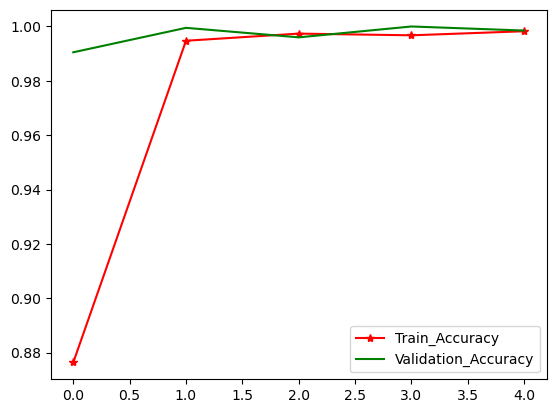

In [36]:
plt.plot(df.accuracy , color= 'red' , label = 'Train_Accuracy' , marker = '*')
plt.plot(df.val_accuracy , color  = 'green' , label = 'Validation_Accuracy')
plt.legend()

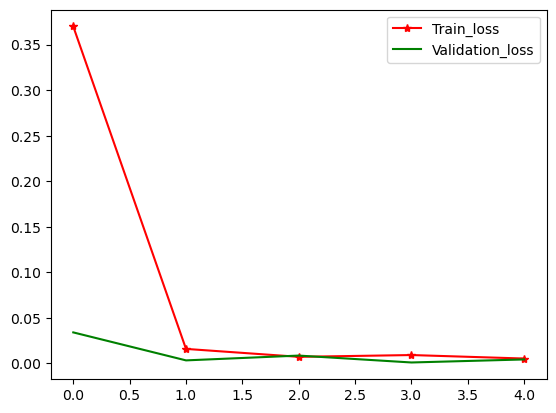

In [37]:
#plt.figure(12,7)
plt.plot(df.loss , color= 'red' , label = 'Train_loss' , marker = '*')
plt.plot(df.val_loss , color  = 'green' , label = 'Validation_loss')
plt.legend()

In [38]:
model_predic = model.predict(test_x)   # in the form of probability

# select the Class which are having high probability

predic_class = model_predic.argmax(axis = 1)   

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step


In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
confusion_matrix(test_y , predic_class )

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 470,   0,   0,  15,   1,   0,   0,   0,  14],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0, 487,   1,   1,   1,   0,   1,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0, 499,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 499]], dtype=int64)

In [41]:
print(classification_report(test_y , predic_class ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.94      0.97       500
           2       1.00      1.00      1.00       500
           3       1.00      0.97      0.99       500
           4       0.97      1.00      0.98       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500
           9       0.97      1.00      0.99       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [30]:
model_predic[0]

array([9.9999893e-01, 1.1363898e-07, 2.0576947e-07, 6.5050011e-07,
       5.4268257e-10, 3.2434954e-08, 4.2654684e-09, 1.7024889e-09,
       1.8422284e-08, 2.2698454e-09], dtype=float32)

# --------------------- Prediction on New Image -------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


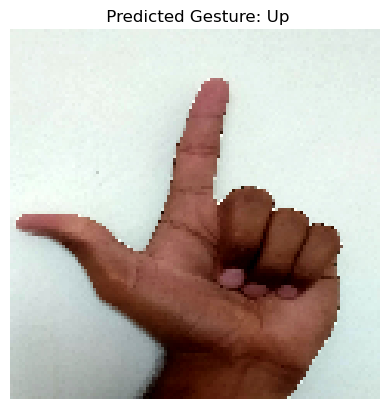

In [45]:
image=load_img(r"D:\Imarticus Learning\Neural_network\images\Up.jpg",target_size=(120,120))  
image=img_to_array(image)                      # Convert the image into array 
image=image/255.0                              # Normalized the image range between [0,1]
prediction_image= np.expand_dims(image, axis=0)# image is (120,120,3) convert into (1,120,120,3)
                                               # So , 1 is used for the batch size 
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
plt.title(f' Predicted Gesture: {move_name}')
plt.axis('off')
plt.imshow(image)

engine = pyttsx3.init()
# Set properties (optional)
# You can set the rate, volume, and voice if you want
engine.setProperty('rate', 80)  # Speed of speech
engine.setProperty('volume', 1)  # Volume (0.0 to 1.0)

# Speak the text
engine.say(move_name)
engine.runAndWait()

# ------------------------- Save the Model --------------------------------

In [43]:
model.save("Final_Project_hand_gesture.h5")

In [4]:
model=load_model("Final_Project_hand_gesture.h5")

# --------------------- Live Hand Detection Project --------------------

In [4]:
model = load_model("Final_Project_hand_gesture.h5")

results = {0: 'Call_Me', 1: 'Fingers_Crossed', 2: 'Nice', 3: 'Stop', 4: 'peace',
    5: 'Rock', 6: 'Rock_On', 7: 'Win', 8: 'Okay', 9: 'Up' }

GR_dict = {  0: (0, 255, 255), 1: (0, 255, 100), 2: (0, 155, 255), 3: (12, 255, 256),
    4: (255, 255, 0), 5: (112, 255, 123), 6: (100, 145, 167), 7: (255, 0, 111),
    8: (0, 0, 125), 9: (124, 255, 255) }
rect_size = 4
cap = cv2.VideoCapture(1)

haarcascade = cv2.CascadeClassifier(r"D:\Imarticus Learning\Neural_network\XML file\haarcascade_hand.xml")
while True:
    rval, im = cap.read()
    if not rval or im is None:
        print("Error: Unable to read frame from the camera.")
        break

    im = cv2.flip(im, 1, 1)

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    hands = haarcascade.detectMultiScale(rerect_size)
    
    for f in hands:
        (x, y, w, h) = [v * rect_size for v in f]
        hand_img = im[y:y+h, x:x+w]

        image = cv2.resize(hand_img, (120, 120))
        image=image/255.0        # Normalized the image 
        prediction_image= np.expand_dims(image, axis=0)
        prediction=model.predict(prediction_image)
        label=np.argmax(prediction)
        print(label)
        cv2.rectangle(im, (x, y), (x+w, y+h), GR_dict[label], 2)
        cv2.rectangle(im, (x, y-40), (x+w, y), GR_dict[label], -1)
        cv2.putText(im, results[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    cv2.imshow('Live Camera', im)
    key = cv2.waitKey(50)
    
    if key == 27:  # use the escape key
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98m

# ----------------------- Audio Of Prediction --------------------------

In [45]:
pip install pyttsx3


  Obtaining dependency information for pyttsx3 from https://files.pythonhosted.org/packages/33/9a/de4781245f5ad966646fd276259ef7cfd400ba3cf7d5db7c0d5aab310c20/pyttsx3-2.90-py3-none-any.whl.metadata
  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/f5/c0/14dae7492649d7b41cc4f1dd392dd7bb2bc46a07f099f1d2cf4d8dff03e5/comtypes-1.4.4-py3-none-any.whl.metadata
  Obtaining dependency information for pypiwin32 from https://files.pythonhosted.org/packages/d0/1b/2f292bbd742e369a100c91faa0483172cd91a1a422a6692055ac920946c5/pypiwin32-223-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/210.6 kB ? eta -:--:--
   ---------------------------------------- 210.6/210.6 kB 6.3 MB/s eta 0:00:00


In [56]:
import pyttsx3

# Define the mapper text

# Initialize the pyttsx3 engine
engine = pyttsx3.init()

# Set properties (optional)
# You can set the rate, volume, and voice if you want
engine.setProperty('rate', 80)  # Speed of speech
engine.setProperty('volume', 1)  # Volume (0.0 to 1.0)

# Speak the text
engine.say(mo)
engine.runAndWait()


# ------------- Diff Diff Size, Sha of Images 

In [30]:
from keras.preprocessing.image import  array_to_img ,  img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
img = load_img(r"D:\Imarticus Learning\Neural_network\Project_hand_geture\Fingers_Crossed\Finger_Cross_0_24.JPG")
x = img_to_array(img)

In [43]:
x = x.reshape((1,) + x.shape)
x.shape   # must as image generator takes i/p in this format 

(1, 4000, 3000, 3)

In [44]:
GenerateImage = ImageDataGenerator( rotation_range=10 , width_shift_range=.1 , height_shift_range=.1 , 
                                   shear_range=.1 , zoom_range=.1  , fill_mode='nearest')

In [45]:
i = 0
for batch in GenerateImage.flow(x, batch_size=1 , save_to_dir=r"D:\Imarticus Learning\Neural_network\Project_hand_geture\Fingers_Crossed", save_prefix="Fin_cro" , save_format='JPG'):
    i = i+1
    if i>130:
        break
    

In [4]:
import cv2
import numpy as np
import time
from keras.models import load_model

model = load_model("Final_Project_hand_gesture.h5")

results = {0: 'Call_Me', 1: 'Fingers_Crossed', 2: 'Nice', 3: 'Stop', 4: 'peace',
           5: 'Rock', 6: 'Rock_On', 7: 'Win', 8: 'Okay', 9: 'Up'}

GR_dict = {0: (0, 255, 255), 1: (0, 255, 100), 2: (0, 155, 255), 3: (12, 255, 256),
           4: (255, 255, 0), 5: (112, 255, 123), 6: (100, 145, 167), 7: (255, 0, 111),
           8: (0, 0, 125), 9: (124, 255, 255)}

rect_size = 4
cap = cv2.VideoCapture(0)

haarcascade = cv2.CascadeClassifier(r"D:\Imarticus Learning\Neural_network\XML file\haarcascade_hand.xml")

while True:
    rval, im = cap.read()
    if not rval or im is None:
        print("Error: Unable to read frame from the camera.")
        break

    im = cv2.flip(im, 1, 1)
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    hands = haarcascade.detectMultiScale(rerect_size)

    if len(hands) > 0:
        for f in hands:
            (x, y, w, h) = [v * rect_size for v in f]
            hand_img = im[y:y+h, x:x+w]

            image = cv2.resize(hand_img, (120, 120))
            image = image / 255.0  # Normalize the image
            prediction_image = np.expand_dims(image, axis=0)
            prediction = model.predict(prediction_image)
            label = np.argmax(prediction)
            print(label)
            cv2.rectangle(im, (x, y), (x+w, y+h), GR_dict[label], 2)
            cv2.rectangle(im, (x, y-40), (x+w, y), GR_dict[label], -1)
            cv2.putText(im, results[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    cv2.imshow('Live Camera', im)
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step



KeyboardInterrupt

